# Using Production Coverage Measures to delete Parts of a Software System

## Exercise

_Level: Easy_

### Background

Developers of the Java application "Spring PetClinic" said, that there would be much code that isn't used at all. 

### Your Task

Before migrating the application to the new platform, an analysis should find out, which parts of the system are still in use and which are not (and may be deleted safely).


### Your Approach?

Write down your approach in the Software Analytics Canvas!

## The Dataset

To understand how much code isn't used, we recorded the executed code in production with the coverage tool [JaCoCo](http://www.jacoco.org/). The measurement took place between 21st Oct 2017 and 27st Oct 2017. The results were exported into a CSV file using the JaCoCo command line tool with the following command:

```bash
java -jar jacococli.jar report "C:\Temp\jacoco.exec" --classfiles \
C:\dev\repos\spring-petclinic\target\classes --csv jacoco.csv
```

The CSV file `../datasets/jacoco_production_measure.gz` contains all lines of code that were passed through during the measurement's time span. It shows a subset of the dataset created above with just the relevant coluns:

* `PACKAGE`: The package name of the Java source code file
* `CLASS`: The name of the Java class
* `LINE_COVERED`: The number of lines that were executed
* `LINE_MISSED`: The number of lines that weren't executed

Here you can find the first 10 entries from the dataset (with the columns from above:

<p>
<small>
<code>PACKAGE,CLASS,LINE_MISSED,LINE_COVERED
org.springframework.samples.petclinic,PetclinicInitializer,0,24
org.springframework.samples.petclinic.model,NamedEntity,1,4
org.springframework.samples.petclinic.model,Specialty,0,1
org.springframework.samples.petclinic.model,PetType,0,1
org.springframework.samples.petclinic.model,Vets,4,0
org.springframework.samples.petclinic.model,Visit,0,12
org.springframework.samples.petclinic.model,BaseEntity,0,5
org.springframework.samples.petclinic.model,Person,0,7
org.springframework.samples.petclinic.model,Owner,14,26
</code>
</small>
</p>

Hint 1: You need to add an additional `LINES` column to be able to calculate the ratio between covered and missed lines later on.  
Hint 2: It was stated that mayby whole packages wouldn't be needed anymore and that they could be safely removed. 

## Your Analysis

### Step 1: Load the dataset

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
import pandas as pd

coverage = pd.read_csv("../datasets/jacoco_production_measure.gz")
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24
1,org.springframework.samples.petclinic.model,NamedEntity,1,4
2,org.springframework.samples.petclinic.model,Specialty,0,1
3,org.springframework.samples.petclinic.model,PetType,0,1
4,org.springframework.samples.petclinic.model,Vets,4,0


### Step 2: Data preparation
Create additional columns that how all lines of a class and the ratio of the covered lines to all lines of a class,

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
coverage['lines'] = coverage.LINE_COVERED + coverage.LINE_MISSED
coverage['ratio'] = coverage.LINE_COVERED / coverage.lines
coverage.head()

,PACKAGE,CLASS,LINE_MISSED,LINE_COVERED,lines,ratio
0,org.springframework.samples.petclinic,PetclinicInitializer,0,24,24,1.0
1,org.springframework.samples.petclinic.model,NamedEntity,1,4,5,0.8
2,org.springframework.samples.petclinic.model,Specialty,0,1,1,1.0
3,org.springframework.samples.petclinic.model,PetType,0,1,1,1.0
4,org.springframework.samples.petclinic.model,Vets,4,0,4,0.0


### Step 3: Modelling
Calculate the mean coverage ratio per package.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
mean_coverage = coverage.groupby("PACKAGE")['ratio'].mean()
mean_coverage

PACKAGE
org.springframework.samples.petclinic                    1.000000
org.springframework.samples.petclinic.model              0.739048
org.springframework.samples.petclinic.repository.jdbc    0.000000
org.springframework.samples.petclinic.repository.jpa     0.691558
org.springframework.samples.petclinic.service            0.888889
org.springframework.samples.petclinic.util               0.270833
org.springframework.samples.petclinic.web                0.639809
Name: ratio, dtype: float64

### Step 4: Visualization
Create a horizontal line chart that visualizes the coverage ratios for each package.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

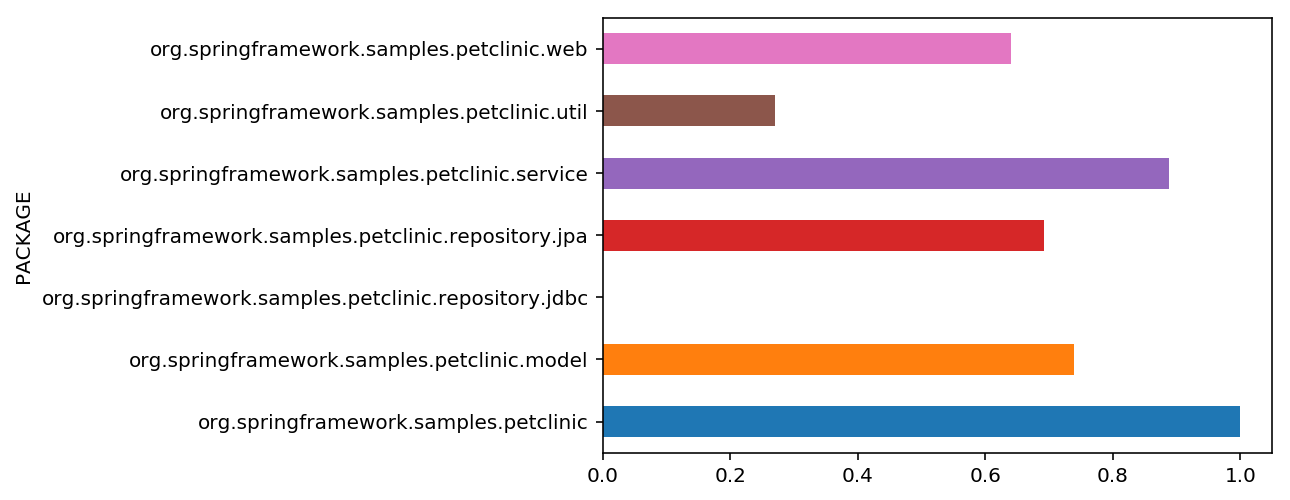

In [ ]:
%matplotlib inline
mean_coverage.plot(kind='barh');